In [7]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Ceccarelli_MasterThesis&Internship/Master Thesis/embeddings_saplma/'

In [4]:
hallu_factalign_1_0_1000 = pd.read_csv(path + 'factalign/embeddings_factalignllama3.2-3B_1_0:1000.csv', index_col=0)
hallu_factalign_1_1000_end = pd.read_csv(path + 'factalign/embeddings_factalignllama3.2-3B_1_1000:.csv', index_col=0)

hallu_factbench_1 = pd.read_csv(path + 'factbench/embeddings_factbenchllama3.2-3B_1.csv', index_col=0)
hallu_felm_1 = pd.read_csv(path + 'felm/embeddings_felmllama3.2-3B_1.csv', index_col=0)

In [5]:
hallu_factalign_1 = pd.concat([hallu_factalign_1_0_1000, hallu_factalign_1_1000_end]).reset_index()

hallu_factbench_1 = hallu_factbench_1.reset_index()

hallu_felm_1 = hallu_felm_1.reset_index()

In [6]:
hallu_factbench_1 = hallu_factbench_1[~hallu_factbench_1['embeddings'].isna()]

In [8]:
hallu_factalign_1["embeddings"] = hallu_factalign_1["embeddings"].apply(ast.literal_eval)
hallu_factbench_1["embeddings"] = hallu_factbench_1["embeddings"].apply(ast.literal_eval)
hallu_felm_1["embeddings"] = hallu_felm_1["embeddings"].apply(ast.literal_eval)

In [17]:
label_mapping = {0: "False", 1: "True"}
colors = {0: "red", 1: "blue"}

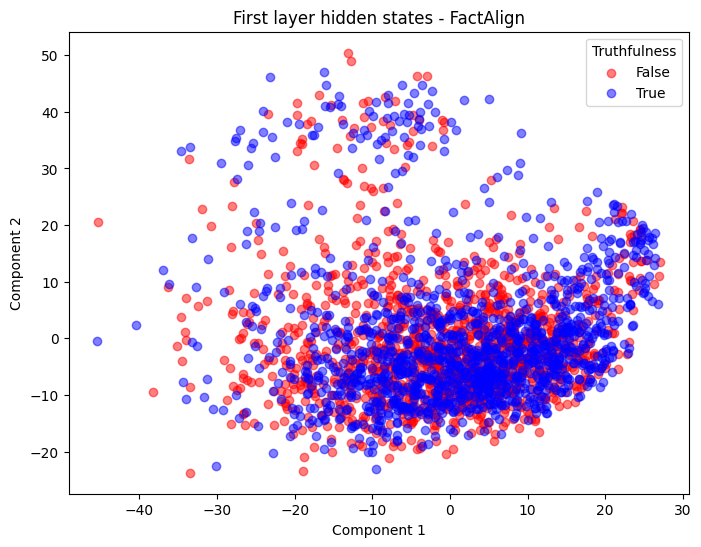

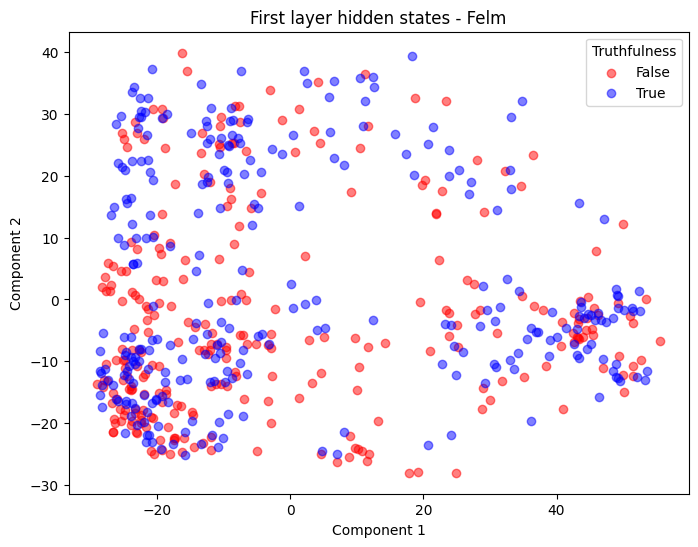

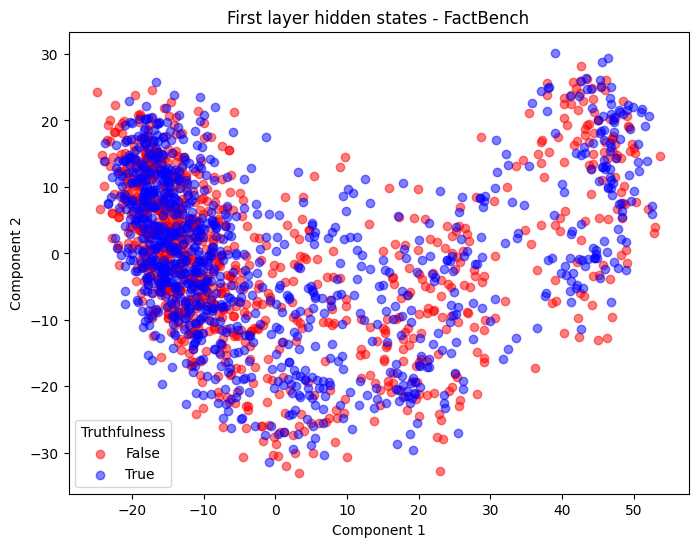

In [20]:
X = np.vstack(hallu_factalign_1["embeddings"].values)
y = hallu_factalign_1["label"].astype(int)

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = X_2d[y == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=color, label=label_mapping[label], alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("First layer hidden states - FactAlign")
plt.legend(title="Truthfulness", labels=["False", "True"])
plt.show()

X = np.vstack(hallu_felm_1["embeddings"].values)
y = hallu_felm_1["hallucination"].astype(int)

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = X_2d[y == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=color, label=label_mapping[label], alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("First layer hidden states - Felm")
plt.legend(title="Truthfulness", labels=["False", "True"])
plt.show()

X = np.vstack(hallu_factbench_1["embeddings"].values)
y = hallu_factbench_1["response_label"].astype(int)

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = X_2d[y == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=color, label=label_mapping[label], alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("First layer hidden states - FactBench")
plt.legend(title="Truthfulness", labels=["False", "True"])
plt.show()